## Data Cleaning and Transformation

In [44]:
import numpy as np 
import pandas as pd # data processing, CSV file 

In [45]:
import multiprocessing
import seaborn as sns
import email
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("emails.csv", encoding="utf-8")
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [47]:
df.shape

(517401, 2)

In [48]:
print(df.loc[1]['message'])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

In [49]:
message = df.loc[1]['message']
e = email.message_from_string(message)

e.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [50]:
e.get('Date')
e.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [51]:
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

Headers


In [52]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall


Message Body

In [53]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!


Employee Names

In [54]:
df['file'][:]

0             allen-p/_sent_mail/1.
1            allen-p/_sent_mail/10.
2           allen-p/_sent_mail/100.
3          allen-p/_sent_mail/1000.
4          allen-p/_sent_mail/1001.
                    ...            
517396    zufferli-j/sent_items/95.
517397    zufferli-j/sent_items/96.
517398    zufferli-j/sent_items/97.
517399    zufferli-j/sent_items/98.
517400    zufferli-j/sent_items/99.
Name: file, Length: 517401, dtype: object

In [55]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,Let's shoot for Tuesday at 11:45.,allen-p
...,...,...,...,...,...,...,...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...,"Wed, 28 Nov 2001 13:30:11 -0800 (PST)",Trade with John Lavorato,"\ExMerge - Zufferli, John\Sent Items","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",This is a trade with OIL-SPEC-HEDGE-NG (John L...,zufferli-j
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...,"Wed, 28 Nov 2001 12:47:48 -0800 (PST)",Gas Hedges,"\ExMerge - Zufferli, John\Sent Items","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",Some of my position is with the Alberta Term b...,zufferli-j
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...,"Wed, 28 Nov 2001 07:20:00 -0800 (PST)",RE: CONFIDENTIAL,"\ExMerge - Zufferli, John\Sent Items","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",2\n\n -----Original Message-----\nFrom: \tDouc...,zufferli-j
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...,"Tue, 27 Nov 2001 11:52:45 -0800 (PST)",Calgary Analyst/Associate,"\ExMerge - Zufferli, John\Sent Items","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,zufferli-j


X-Folder 

In [56]:
print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  517401
number of unique folders:  5336


In [57]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,6639
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,5934
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,5637
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,5211
4,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,5066
5,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,4956
6,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,4660
7,\Kay_Mann_June2001_3\Notes Folders\Sent,4440
8,\Kay_Mann_June2001_4\Notes Folders\'sent mail,4220
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,4022


Visualizing Folders

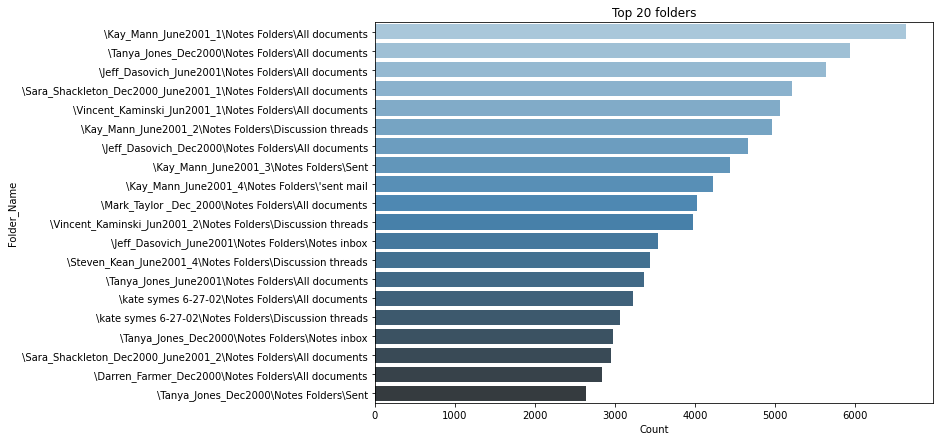

In [58]:
plt.figure(figsize=(10,7))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

Top 20 highest email sender employee

In [59]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,kaminski-v,28465
1,dasovich-j,28234
2,kean-s,25351
3,mann-k,23381
4,jones-t,19950
5,shackleton-s,18687
6,taylor-m,13875
7,farmer-d,13032
8,germany-c,12436
9,beck-s,11830


Data Cleaning and Transformation

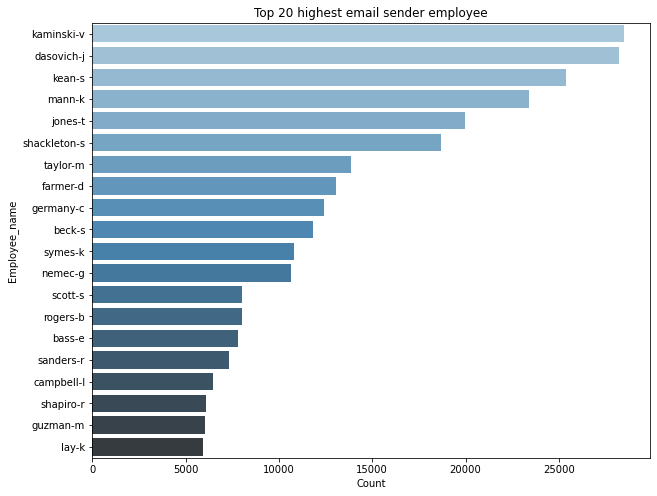

In [60]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [61]:
import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [62]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p


In [63]:
print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail


"'Sent Mail"

In [64]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00,,'sent mail,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00,Re:,'sent mail,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p


In [65]:
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

Unique Foldes:  1782


array(["'sent mail", 'all documents', 'contacts', 'deleted items',
       'discussion threads', 'inbox', 'notes inbox', 'sent items', 'sent',
       'straw', '2000 conference', 'active international', 'avaya', 'bmc',
       'bridge', 'bristol babcock', 'colleen koenig', 'compaq',
       'computer associates', 'continental airlines'], dtype=object)

In [66]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [67]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

In [68]:
df.isnull().sum()

file            0
message         0
date            0
subject     19187
X-Folder       29
X-From         29
X-To         9153
body            0
employee        0
dtype: int64

In [69]:
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

subject     0.037083
X-Folder    0.000056
X-From      0.000056
X-To        0.017690
dtype: float64

In [70]:
df.dropna(axis=0, inplace=True)

In [71]:
df.isnull().sum(), df.shape

(file        0
 message     0
 date        0
 subject     0
 X-Folder    0
 X-From      0
 X-To        0
 body        0
 employee    0
 dtype: int64,
 (489236, 9))

In [72]:
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00,Re:,'sent mail,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,18-10-2000 03:00:00,Re: test,'sent mail,Phillip K Allen,Leah Van Arsdall,test successful. way to go!!!,allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,31-08-2000 05:07:00,Re: Hello,'sent mail,Phillip K Allen,Greg Piper,Let's shoot for Tuesday at 11:45.,allen-p


Columns to Drop

In [73]:
cols_to_drop = ['file','message','date','X-From','X-To','employee']
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()
df.to_csv("cleaned_data.csv", index=False)

## Classification 

Libraries

In [74]:
import matplotlib.pyplot as plt
import re
import string
import time
pd.set_option('display.max_rows', 50)

from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [75]:
df2 = pd.read_csv("cleaned_data.csv")

# view first 5 rows of the dataframe
df2

,subject,X-Folder,body
0,Re:,'sent mail,Traveling to have a business meeting takes the...
1,Re: test,'sent mail,test successful. way to go!!!
2,Re: Hello,'sent mail,Let's shoot for Tuesday at 11:45.
3,Re: Hello,'sent mail,"Greg,\n\n How about either next Tuesday or Thu..."
4,Re: PRC review - phone calls,'sent mail,any morning between 10 and 11:30
...,...,...,...
489231,Trade with John Lavorato,sent items,This is a trade with OIL-SPEC-HEDGE-NG (John L...
489232,Gas Hedges,sent items,Some of my position is with the Alberta Term b...
489233,RE: CONFIDENTIAL,sent items,2\n\n -----Original Message-----\nFrom: \tDouc...
489234,Calgary Analyst/Associate,sent items,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


Removing Folders


In [76]:
def remove_folders(emails, n):
    # returns the number of folders containing more than 'n' number of emails
    email_count = dict(df['X-Folder'].value_counts())
    small_folders = [key for key, val in email_count.items() if val<=n]
    emails = df2.loc[~df['X-Folder'].isin(small_folders)]
    return emails

In [77]:
n = 150
df2 = remove_folders(df2, n)

print("Total folders: ", len(df2['X-Folder'].unique()))
print("df.shape: ", df2.shape)
df2

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [41]:
df2['text'] = df2['subject'] + " " + df2['body']

C:\Users\aashi\AppData\Local\Temp\ipykernel_20224\2736881100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['subject'] + " " + df['body']


In [43]:
df2.drop(['subject','body'], axis=1, inplace=True)

def preprocess(x):
    # lowercasing all the words
    x = x.lower()
    
    # remove extra new lines
    x = re.sub(r'\n+', ' ', x)
    
    # removing (replacing with empty spaces actually) all the punctuations
    x = re.sub("["+string.punctuation+"]", " ", x)
    
    # remove extra white spaces
    x = re.sub(r'\s+', ' ', x)
    
    return x

C:\Users\aashi\AppData\Local\Temp\ipykernel_20224\4076005384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['subject','body'], axis=1, inplace=True)


In [37]:
start = time.time()
df2.loc[:,'text'] = df2.loc[:, 'text'].map(preprocess)

# remove stopwords
df2.loc[:, 'text'] = df2.loc[:, 'text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
end = time.time()
print("Execution time (sec): ",(end - start))

C:\Users\aashi\AppData\Local\Temp\ipykernel_15420\1661627513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'text'] = df.loc[:, 'text'].map(preprocess)


Execution time (sec):  233.41019916534424


C:\Users\aashi\AppData\Local\Temp\ipykernel_15420\1661627513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text'] = df.loc[:, 'text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


In [47]:
start = time.time()
folders_dict = dict(df2['X-Folder'].value_counts().sort_values()[50:70])
data = df2[df2['X-Folder'].isin(folders_dict.keys())]
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  0.03892779350280762


In [48]:
print("Number of instances: ", data.shape[0])
data.to_csv('preprocessed.csv', index=False)

data = pd.read_csv("preprocessed.csv")

Number of instances:  13586


In [49]:
data['X-Folder'].value_counts()

logistics              1170
tw-commercial group    1150
california             1014
bill williams iii      1004
deal discrepancies      878
management              799
calendar                700
esvl                    663
tufco                   604
resumes                 599
e-mail bin              592
ces                     572
online trading          567
junk                    544
junk file               494
ooc                     473
genco-jv_ipo            465
projects                459
corporate               420
archives                419
Name: X-Folder, dtype: int64

In [50]:
def label_encoder(data):
    class_le = LabelEncoder()
    # apply label encoder on the 'X-Folder' column
    y = class_le.fit_transform(data['X-Folder'])
    return y

In [51]:
y = label_encoder(data)
input_data = data['text']

1. Bag of Words

In [94]:
start = time.time()
vectorizer = CountVectorizer(min_df=5, max_features=5000)
X = vectorizer.fit_transform(input_data)
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  1.5069544315338135


In [95]:
start = time.time()
X = X.toarray()
print("X.shape: ",X.shape)
end = time.time()
print("Execution time (sec): ",(end - start))

X.shape:  (13586, 5000)
Execution time (sec):  0.16954970359802246


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

X_test = vectorizer.transform(X_test)

NameError: name 'X' is not defined

In [96]:
f1_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB'],
    'BoW': ''
}
f1_df = pd.DataFrame(f1_data)

jaccard_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB'],
    'BoW': ''
}
jacc_df = pd.DataFrame(jaccard_data)

acc_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB'],
    'BoW': ''
}
acc_df = pd.DataFrame(acc_data)
acc_df

,Algorithm,BoW
0,Gaussian NB,
1,Multinomial NB,


# Training and Evaluation


In [99]:
models = [GaussianNB(), MultinomialNB()]

names = ["Gaussian NB", "Multinomial NB"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
        'jacc_mac': 'jaccard_macro'
    }
    y_pred = model.predict(X_test)
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("Jaccard_index: ", scores['test_jacc_mac'].mean())
    print("time (sec): ", training_time)
    print("\n")
    
    jacc_scores.append(scores['test_jacc_mac'].mean())
    acc_scores.append(scores['test_acc'].mean())
    f1_scores.append(scores['test_f1_mac'].mean())
    exec_times.append(training_time)

    confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
acc_df['BoW'] = acc_scores
jacc_df['BoW'] = jacc_scores
f1_df['BoW'] = f1_scores
acc_df['time'] = exec_times
acc_df

Gaussian NB
accuracy:  0.5852325249983473
f1_score:  0.5621318716847321
Jaccard_index:  0.4130840479833916
time (sec):  12.85170602798462


Multinomial NB
accuracy:  0.7377434135166094
f1_score:  0.7038215928245647
Jaccard_index:  0.5770619060081098
time (sec):  38.366703510284424




,Algorithm,BoW,time
0,Gaussian NB,0.585233,12.851706
1,Multinomial NB,0.737743,38.366704


In [98]:
acc_df.to_csv("accuracy.csv", index=False)
f1_df.to_csv("f1_score.csv", index=False)
jacc_df.to_csv("jacc_score.csv", index=False)

2. Bag of Words

In [100]:
start = time.time()
vectorizer = CountVectorizer(min_df=5, max_features=5000, ngram_range=(2,2))
X = vectorizer.fit_transform(input_data)

X = X.toarray()
print("X.shape: ",X.shape)

end = time.time()
print("Execution time (sec): ",(end - start))

X.shape:  (13586, 5000)
Execution time (sec):  4.105054140090942


Training and Evaluation

In [101]:
models = [GaussianNB(), MultinomialNB()]

names = ["Gaussian NB", "Multinomial NB"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
        'jacc_mac': 'jaccard_macro'
    }
    y_pred = model.predict(X_test)
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("Jaccard_index: ", scores['test_jacc_mac'].mean())
    print("time (sec): ", training_time)
    print("\n")
    
    jacc_scores.append(scores['test_jacc_mac'].mean())
    acc_scores.append(scores['test_acc'].mean())
    f1_scores.append(scores['test_f1_mac'].mean())
    exec_times.append(training_time)
    
    confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))

    
acc_df['BoWBi'] = acc_scores
jacc_df['BoWBi'] = jacc_scores
f1_df['BoWBi'] = f1_scores
acc_df['BoWBi_time'] = exec_times
acc_df

Gaussian NB
accuracy:  0.5833930454364673
f1_score:  0.5621651556732388
Jaccard_index:  0.4068105548950894
time (sec):  12.504441022872925


Multinomial NB
accuracy:  0.6374178145803735
f1_score:  0.6170933752131809
Jaccard_index:  0.4707424107547659
time (sec):  41.257994174957275




,Algorithm,BoW,time,BoWBi,BoWBi_time
0,Gaussian NB,0.585233,12.851706,0.583393,12.504441
1,Multinomial NB,0.737743,38.366704,0.637418,41.257994


TF-IDF

In [60]:
start = time.time()
vectorizer = TfidfVectorizer(min_df=5, max_features=5000)
X = vectorizer.fit_transform(input_data)

X = X.toarray()
print("X.shape: ",X.shape)

end = time.time()
print("Execution time (sec): ",(end - start))

X.shape:  (13586, 5000)
Execution time (sec):  1.6177070140838623


In [61]:
models = [GaussianNB(), MultinomialNB()]

names = ["Gaussian NB", "Multinomial NB"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
        'jacc_mac': 'jaccard_macro'
    }
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("Jaccard_index: ", scores['test_jacc_mac'].mean())
    print("time (sec): ", training_time)
    print("\n")
    
    jacc_scores.append(scores['test_jacc_mac'].mean())
    acc_scores.append(scores['test_acc'].mean())
    f1_scores.append(scores['test_f1_mac'].mean())
    exec_times.append(training_time)
    
acc_df['TfIdf'] = acc_scores
jacc_df['TfIdf'] = jacc_scores
f1_df['TfIdf'] = f1_scores
acc_df['TfIdf_time'] = exec_times
acc_df

Gaussian NB
accuracy:  0.6093018127120674
f1_score:  0.5877402363957523
Jaccard_index:  0.44084640698807825
time (sec):  12.059986352920532


Multinomial NB
accuracy:  0.7368567808999297
f1_score:  0.6967070564788325
Jaccard_index:  0.5701299709091912
time (sec):  3.1453583240509033




,Algorithm,BoW,time,BoWBi,BoWBi_time,TfIdf,TfIdf_time
0,Gaussian NB,0.585233,19.818053,0.609302,13.891714,0.609302,12.059986
1,Multinomial NB,0.737743,40.009585,0.736857,2.809564,0.736857,3.145358


In [57]:
acc_df.to_csv("accuracy.csv", index=False)
f1_df.to_csv("f1_score.csv", index=False)
jacc_df.to_csv("jacc_score.csv", index=False)

,Algorithm,BoW,BoWBi,TfIdf
0,Gaussian NB,0.413084,0.406811,0.440846
1,Multinomial NB,0.577062,0.470742,0.570130
